In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# I somehow hate matplotlibs dark mode (I run a darkmode notebook), so I set it default
# dec 2022
#plt.style.use('default') 

In [2]:
# This is the data from kaggle that we downloaded, and we put it in the same folder as this notebook
# It's a csv file, so we can use pandas to read it with read_csv. 
df = pd.read_csv('NetflixOriginals.csv')

In [3]:
# Always good to have a sanity check, so we can see the first 5 rows of the data
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


## What are some questions we want to ask?

One of the first things when doing EDA is to consider questions that you would like to know the answer to from the data.
For example in this case, we might want to know:

1. What are the most popular genres?
2. What are the most popular movies?
3. Is there any relationship between the number of movies and the year?
4. Is there any variable that seems to correlate with the rating of a movie?


You should write a big list of questions! whatever comes to mind just looking at the first 5 rows.
Then you can start to think about how you might answer those questions.



In [4]:
# Let's try to understand the first question.
# What are the most popular genres?
# We can see that the genres are in a column called 'Genre'
# We can use the value_counts() function to count the number of times each genre appears

df['Genre'].value_counts()

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64

In [5]:
# The above output isn't a bit too long to read.
# But I'm noticing that some genres are repeated, but with different capitalization, this may be something I can clean later
# For the time being, I want to see if I can find a list of all the genres that have more than 1 occurence

# We can use a boolean mask to do this
# A boolean mask is a list of True/False values that we can use to filter our data

mask = df['Genre'].value_counts() > 1 # this will return a mask of True/False values
df['Genre'].value_counts()[mask] # this will return the value counts of the genres that have more than 1 occurence

# After this prints out you may decide you need to change the number of occurences.

Documentary                 159
Drama                        77
Comedy                       49
Romantic comedy              39
Thriller                     33
Comedy-drama                 14
Crime drama                  11
Biopic                        9
Horror                        9
Action                        7
Romance                       6
Concert Film                  6
Aftershow / Interview         6
Animation                     5
Action comedy                 5
Romantic drama                5
Psychological thriller        4
Science fiction/Thriller      4
Variety show                  4
Science fiction               4
Animation / Short             4
Action-thriller               3
Sports-drama                  3
One-man show                  3
Horror thriller               3
Western                       3
Science fiction/Drama         3
Dark comedy                   2
Satire                        2
War drama                     2
Family                        2
Spy thri

<Axes: title={'center': 'Most Popular Genres'}, xlabel='Genre', ylabel='Number of Occurences'>

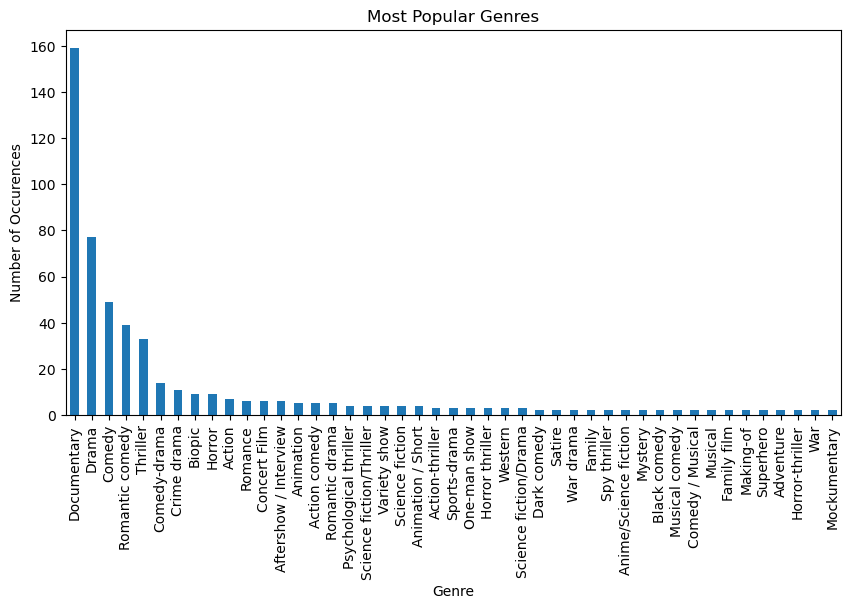

In [6]:
# Now that we have a list of genres that have more than 1 occurence, we can plot them
# We can use the plot() function to plot the value counts of the genres that have more than 1 occurence
# We can also use the kind parameter to specify the type of plot we want
# We can use the figsize parameter to specify the size of the plot
# We can use the title parameter to specify the title of the plot
# We can use the xlabel parameter to specify the x axis label of the plot
# We can use the ylabel parameter to specify the y axis label of the plot

df['Genre'].value_counts()[mask].plot(kind='bar', figsize=(10, 5), title='Most Popular Genres', xlabel='Genre', ylabel='Number of Occurences')

But wait, this tells me which genre repeated the most, not which one had a high IMDB rating. Let's try to find the highest rated genre.

In [7]:
# We need to group the data by genre and then find the mean of the IMDB Score
# First we need to group the data by genre, this makes "groups" of data for each genre
# Then we need to find the mean of the IMDB Score for each group
# Then we need to sort the data by the mean of the IMDB Score
# We want to sort the data in descending order, so we need to set the ascending parameter to False
# Then we need to get the first 10 rows of the data
df.groupby('Genre')['IMDB Score'].mean().sort_values(ascending=False).head(10)

Genre
Animation/Christmas/Comedy/Adventure    8.200000
Musical / Short                         7.700000
Concert Film                            7.633333
Anthology/Dark comedy                   7.600000
Animation / Science Fiction             7.500000
Making-of                               7.450000
Action-adventure                        7.300000
Historical drama                        7.200000
Coming-of-age comedy-drama              7.200000
Drama-Comedy                            7.200000
Name: IMDB Score, dtype: float64

 Now you try finding the movie languages with the highest IMDB Score, you can use the same pattern as above.

In [8]:
df.groupby('Language')['IMDB Score'].mean().sort_values(ascending=False).head(10)

Language
English/Ukranian/Russian    8.4
English/Akan                7.7
English/Hindi               7.3
English/Arabic              7.3
English/Korean              7.3
English/Russian             7.3
Spanish/English             7.3
Khmer/English/French        7.2
Tamil                       7.2
Bengali                     7.1
Name: IMDB Score, dtype: float64

# It's your turn now.

Now we want you to go ahead and try to answer your own questions. A few big things are going to happen.

1. You will get stuck
2. You won't know what to do
3. You will get frustrated

This is all normal! This is how everyone learns to program and do data science. Just like chess has nearly infinite branching factors, learning to do data science has a similar branching factor. We cannot teach you every branch, you will encounter many things you have not been shown how to do. That's ok! Our hope is that you will learn how to learn, and that you will learn how to find the answers to your questions.

More importantly, we are here for you on discord, waiting to answer your questions. Please ask us questions! We are here to help you learn.

Some last tips of advice.

1. You can start by just adjusting existing code patterns you have already seen.
2. When you have a big question, try to break it into small tasks. For example if my question is "3. Is there any relationship between the number of movies and the year?" Then I will want to break that into smaller tasks. I might start with "How do I get the number of movies per year?" and then "How do I plot the number of movies per year?" and then "How do I plot the number of movies per year in a way that I can see the relationship between the number of movies and the year?" Keep breaking things into smaller tasks and doing them. Then put it all together.

Good luck! We are here to help you!


In [38]:
# we want to see if rating of a movie is correlated to the month of year when it premieres. 
df['Premiere'] = pd.to_datetime(df['Premiere'])
df['Month'] = df['Premiere'].dt.month #add a column feature 'month'
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Month
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,8
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,8
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,12
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,1
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,10


In [65]:
df_month = df.groupby('Month')['IMDB Score'].mean().sort_values(ascending=False).to_frame()
df_month.sort_values('Month')

,IMDB Score
Month,
1,6.002703
2,6.117949
3,6.322917
4,6.049206
5,6.213208
6,6.582857
7,6.091176
8,5.951351
9,6.481132


<Axes: title={'center': 'IMDB by Month'}, xlabel='Month', ylabel='Mean IMDB Score'>

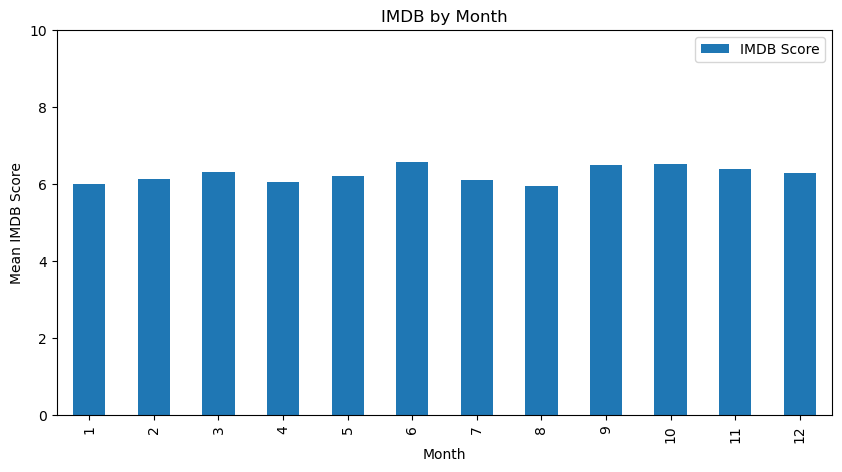

In [76]:

df_month.sort_values('Month').plot(kind='bar', figsize=(10, 5), title='IMDB by Month', xlabel='Month', ylabel='Mean IMDB Score', ylim=[0,10])

In [28]:
df['Month'].value_counts().sort_values(ascending=False) # which month has the most releases?

October      77
April        63
November     57
May          53
September    53
December     51
March        48
February     39
August       37
January      37
June         35
July         34
Name: Month, dtype: int64

In [73]:
top20=df.sort_values('IMDB Score', ascending=False).head(20)
top20

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Month
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English,10
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,12
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,12
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,10
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,12
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English,5
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English,10
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English,11
573,Klaus,Animation/Christmas/Comedy/Adventure,2019-11-15,97,8.2,English,11
571,13th,Documentary,2016-10-07,100,8.2,English,10


In [77]:
top20['Month'].value_counts()

10    5
12    4
11    3
8     2
5     1
6     1
3     1
9     1
7     1
4     1
Name: Month, dtype: int64

In [79]:
#IMDB score >= 8
mask = df['IMDB Score']>= 8
highest_rated = df[mask]
highest_rated

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Month
567,Struggle: The Life and Lost Art of Szukaiski,Documentary,2018-12-21,105,8.0,English,12
568,Chasing Coral,Documentary,2017-07-14,89,8.1,English,7
569,My Octopus Teacher,Documentary,2020-09-07,85,8.1,English,9
570,Rising Phoenix,Documentary,2020-08-26,106,8.1,English,8
571,13th,Documentary,2016-10-07,100,8.2,English,10
572,Disclosure: Trans Lives on Screen,Documentary,2020-06-19,107,8.2,English,6
573,Klaus,Animation/Christmas/Comedy/Adventure,2019-11-15,97,8.2,English,11
574,Seaspiracy,Documentary,2021-03-24,89,8.2,English,3
575,The Three Deaths of Marisela Escobedo,Documentary,2020-10-14,109,8.2,Spanish,10
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English,11


In [81]:
highest_rated['Month'].value_counts()

10    5
12    4
11    2
7     1
9     1
8     1
6     1
3     1
5     1
Name: Month, dtype: int64

<Axes: title={'center': 'Top 20'}, xlabel='release month', ylabel='# of movies in top 20'>

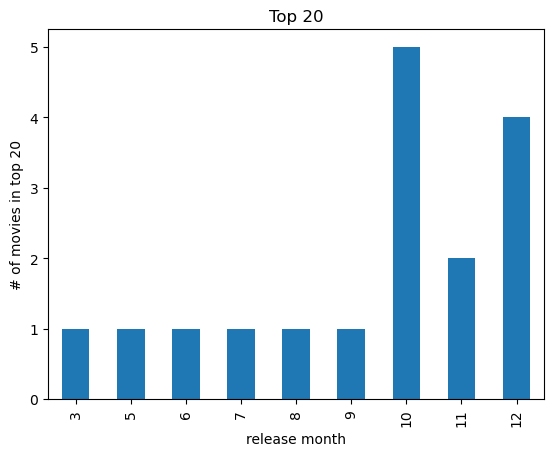

In [90]:
highest_rated['Month'].value_counts().sort_index().plot(kind='bar', xlabel='release month', ylabel='# of movies in top 20', title='Top 20')

In [91]:
df['Year'] = df['Premiere'].dt.year #add a column feature 'Year'
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Month,Year
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,8,2019
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,8,2020
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,12,2019
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,1,2018
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,10,2020


In [92]:
df['Year'].value_counts()

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: Year, dtype: int64

<Axes: xlabel='Year', ylabel='Average IMDB Score'>

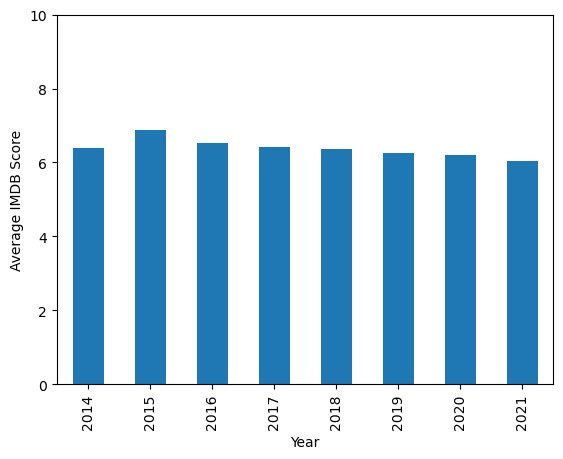

In [98]:
df.groupby('Year')['IMDB Score'].mean().sort_index().plot(kind='bar', ylim=[0,10], ylabel='Average IMDB Score')